<a href="https://colab.research.google.com/github/JorgeLNG/PROYECTO/blob/main/CLASIFICADOR_DE_IMAGENES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importacion de** **Librerias**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import os
from random import randint

**Establecimiento** **de** **Parametros** **importantes** **para** **poder** **entrenar**

In [2]:
batch_size = 32
learning_rate = 0.0001
num_classes = 10
epochs = 100

batch_size : indica el número de imágenes que se pasaran a la vez 

learning_rate:es muy importante ya que puede hacer que una red funcione o deje de funcionar, va relacionado con lo fuerte que es la ctualizacion en los pesos de la red.

num_classes: Es el numero de clases que tiene nuestro DataSet.

epoch: Cada vez que la red ve todas las imagenes establecidas en batch_size.

**Cargar el Dataset y Visualizacion del numero de muestras para el conjunto de entrenamiento y test**

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'entrenamiento')
print(x_test.shape[0], 'test')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 entrenamiento
10000 test


**Convirtiendo etiquetas a un formato adecuado**

In [4]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

**Visualizacion de algunas muestras aleatorias del dataset de entrenamiento**

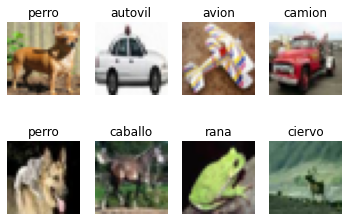

In [5]:
labels = ['avion', 'autovil', 'pajaro', 'gato', 'ciervo', 'perro', 'rana', 'caballo', 'embarcacion', 'camion']

fig, ax = plt.subplots(nrows=2, ncols=4)

for row in ax:
  for col in row:
    img_idx = randint(0,x_train.shape[0]-1)
    img = x_train[img_idx]
    col.imshow(img)
    col.set_title(labels[np.argmax(y_train[img_idx])])
    col.set_axis_off()

plt.show()

**Arquitectura de la Red Neuronal Convolucional (CNN)**

En el bloque1 y bloque2 esta implementado el extractor de caracteristicas, consta de varias capas que van aplicar convoluciones para extraer distintos tipos de patrones.

El bloque3 es un clasificador que tiene como entrada las caracteristicas extraidas y como salida un numero que indica la clase de la imagen de entrada.

In [6]:
model = Sequential()

#bloque 1 de la red Convoulucional
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

#bloque 2 de la red Convoulucional
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

In [7]:
#bloque 3 de la red Convolucional (Clasificador)
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

**Implementacion del Optimizador.** Es el metodo utilizado para calcular las actualizaciones de los pesos

In [8]:
opt = RMSprop(lr=learning_rate, decay=1e-6)

**Definimos la funcion de perdida.** Es la que indica a la red si se esta equivocando o no y que presicion tiene lared segun va entrenando.

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

**Preparacion del Dataset (Normalizacion de las Imagenes)** Se normaliza para que los pesos se actualicen de una forma menos agresiva.

In [10]:
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

**Division del Dataset de Entrenamiento en: Entrenamiento y Validacion** El subconjunto de Validacion sive para poder ver la precicion que esta teniendo la red en datos que no ha visto nunca. si no usaramos el subconjunto de validacion deberiamos esperar a que termine de entrenar para poder testear locual no seria conveniente.

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

**Entrenamiento de la Red**

In [12]:
h = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_val, y_val),
              shuffle=True)

Epoch 1/100
1250/1250 [==============================] - 14s 5ms/step - loss: 2.0641 - accuracy: 0.2249 - val_loss: 1.6383 - val_accuracy: 0.4139
Epoch 2/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6359 - accuracy: 0.4054 - val_loss: 1.4566 - val_accuracy: 0.4711
Epoch 3/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4810 - accuracy: 0.4616 - val_loss: 1.3701 - val_accuracy: 0.5073
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3824 - accuracy: 0.4977 - val_loss: 1.2621 - val_accuracy: 0.5486
Epoch 5/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3125 - accuracy: 0.5282 - val_loss: 1.2134 - val_accuracy: 0.5652
Epoch 6/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2586 - accuracy: 0.5500 - val_loss: 1.1738 - val_accuracy: 0.5824
Epoch 7/100
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2115 - accuracy: 0.5690 - val_loss: 1.1012 - val_a

**Evaluacion del Modelo entrenado**

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('loss:', scores[0])
print('acc:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7059 - accuracy: 0.7716
loss: 0.7059027552604675
acc: 0.7716000080108643


**Guardar el Modelo**

In [14]:
model.save('modelo_CLASIFICADORIMAGENES.h5')

**Graficas de Pérdidas y Presición**

Text(0, 0.5, 'Loss')

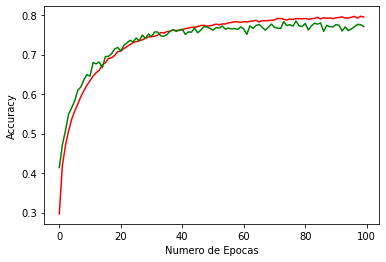

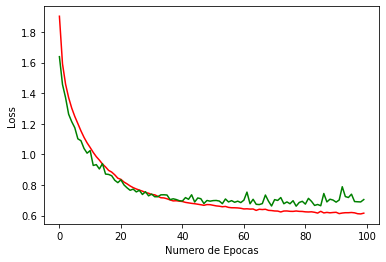

In [15]:
plt.figure(0)
plt.plot(h.history['accuracy'], 'r')
plt.plot(h.history['val_accuracy'],'g')
plt.xlabel('Numero de Epocas')
plt.ylabel('Accuracy')

plt.figure(1)
plt.plot(h.history['loss'], 'r')
plt.plot(h.history['val_loss'], 'g')
plt.xlabel('Numero de Epocas')
plt.ylabel('Loss')

**Visualizar Matriz de Confusion**

313/313 - 0s


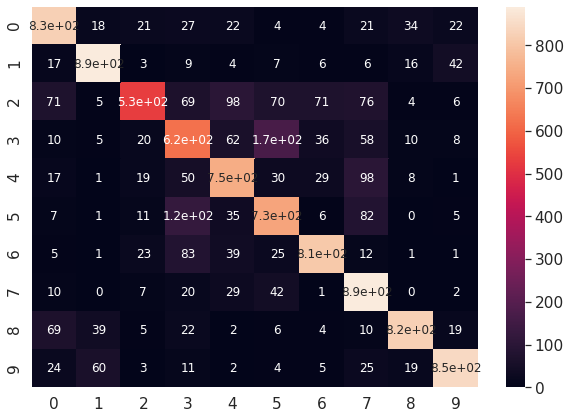

In [16]:
#Calculo de las predicciones para crear la matriz de confusion
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)

#Calculo de la matriz de confusion
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)

#Visualizacion de la matriz de confusion con seaborn
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 12})
plt.show()